NumPy (numpy) is imported for numerical computing, 
while TensorFlow (tensorflow) is imported for building and training machine learning models in Python.

In [1]:
import numpy as np
import tensorflow as tf


This code snippet imports necessary modules from TensorFlow's Keras API for building convolutional neural networks (CNNs) for image classification tasks. Specifically, it imports ImageDataGenerator for data augmentation and preprocessing, Sequential for creating a linear stack of layers, and various layers such as Conv2D, MaxPool2D, Flatten, and Dense for building the CNN architecture. Additionally, it imports the os module for interacting with the operating system.

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,BatchNormalization
import os

The provided code assigns the directory path "C:\Users\vaish\OneDrive\Desktop\AI\archive (7)" to the variable path, which likely represents the location of a dataset or files on the local filesystem.






In [3]:
train=r"C:\Users\vaish\OneDrive\Desktop\AI\archive (7)\train"
testing=r"C:\Users\vaish\OneDrive\Desktop\AI\archive (7)\test"

This code sets the variables img_width and img_height to the values 300, indicating the desired width and height for images. These variables are commonly used when working with image data, such as in image preprocessing or model input dimensions.

In [4]:
img_width,img_height=300,300

This line of code sets the batch size to 32, which determines the number of training examples processed in each iteration during model training.

In [5]:
batch_size=32

This code initializes an ImageDataGenerator object data_gen, which is used for real-time data augmentation and preprocessing of image data. Various augmentation parameters are set, including rescaling pixel values, rotation range, width and height shift range, shear range, and horizontal flipping. These augmentations help increase the diversity of training data and improve the robustness of the model.

In [6]:
data_gen=ImageDataGenerator(rescale=1.0/255,
                           rotation_range=20,
                           width_shift_range=0.2,height_shift_range=0.2,
                           shear_range=0.2,
                           horizontal_flip=True)

This line of code creates a data generator generator using the ImageDataGenerator object data_gen previously defined. It generates batches of augmented data from the directory specified by the path variable. The flow_from_directory method is used to load images directly from the directory structure, organizing them into batches for model training.

In [7]:
generator=data_gen.flow_from_directory(train)

Found 2687 images belonging to 3 classes.


This line of code initializes the training data generator x_train using the ImageDataGenerator object data_gen and the directory specified by path. It specifies the target size for resizing images to (img_width, img_height), sets the batch size to batch_size, and specifies the class mode as "categorical" indicating one-hot encoded labels for classification tasks.

In [8]:
x_train=data_gen.flow_from_directory(train,target_size=(img_width,img_height),
                                      batch_size=batch_size,class_mode="categorical")

Found 2687 images belonging to 3 classes.


The code generator.classes retrieves the class indices associated with the images loaded by the data generator generator. These class indices represent the labels or categories of the images in the dataset.

In [9]:
generator.classes

array([0, 0, 0, ..., 2, 2, 2])

This line of code creates a data generator test using the ImageDataGenerator object data_gen, loading images from the directory specified by r"C:\Users\vaish\OneDrive\Desktop\AI\archive (7)". The generator is set up to process images for testing purposes.


In [10]:
test=data_gen.flow_from_directory(r"C:\Users\vaish\OneDrive\Desktop\AI\archive (7)\test")

Found 30 images belonging to 3 classes.


The code test.labels retrieves the labels associated with the images loaded by the data generator test. These labels represent the class indices or categories of the images in the dataset.

In [11]:
test.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

Apologies for the confusion earlier. The code generator.classes retrieves the class indices associated with the images loaded by the data generator generator. These class indices represent the labels or categories of the images in the dataset.

In [12]:
generator.classes

array([0, 0, 0, ..., 2, 2, 2])

This line of code initializes a new ImageDataGenerator object test_dataset for preprocessing and rescaling images from the test dataset. The rescale parameter is set to 1.0/255, which means it scales the pixel values of the images to be in the range [0,1].

In [13]:
test_dataset=ImageDataGenerator(rescale=1.0/255)

This line of code creates a data generator x_test using the ImageDataGenerator object test_dataset, loading images from the directory specified by path for the purpose of testing. It specifies the target size for resizing images to (img_width, img_height), sets the batch size to batch_size, and specifies the class mode as "categorical" indicating one-hot encoded labels for classification tasks.

In [14]:
x_test=test_dataset.flow_from_directory(testing,target_size=(img_width,img_height),
                                      batch_size=batch_size,class_mode="categorical")

Found 30 images belonging to 3 classes.


This code defines a convolutional neural network (CNN) model using TensorFlow's Keras API. It's a sequential model consisting of several layers:

Conv2D layers with 32, 64, 128, and 128 filters respectively, each with a kernel size of (3,3) and ReLU activation function.
MaxPool2D layers with a pool size of (2,2) for downsampling.
Flatten layer to flatten the output from the convolutional layers into a one-dimensional array.
Dense layers with 512, 256, and 3 neurons respectively, with ReLU activation for the hidden layers and softmax activation for the output layer (since it's a classification task with three classes).
The input_shape parameter of the first Conv2D layer is set to (img_width, img_height, 3), indicating the input shape of the images (width, height, and number of channels, which is 3 for RGB images).

In [15]:
model=Sequential([
    Conv2D(32,(3,3),activation="relu",
    input_shape=(img_width,img_height,3)),
    MaxPool2D((2,2)),
    BatchNormalization(),
    Conv2D(64,(3,3),activation="relu"),
    MaxPool2D((2,2)),
    BatchNormalization(),
    Conv2D(128,(3,3),activation="relu"),
    MaxPool2D((2,2)),
    BatchNormalization(),
    Conv2D(128,(3,3),activation="relu"),
    MaxPool2D((2,2)),
    BatchNormalization(),
    Flatten(),
    Dense(512,activation="relu"),
    Dense(256,activation="relu"),
    Dense(3,activation="softmax")
])

This line of code compiles the previously defined Keras model. The parameters used are:

optimizer="adam": This specifies the Adam optimization algorithm, which is a popular choice for training neural networks.
loss="categorical_crossentropy": This sets the loss function to categorical crossentropy, commonly used for multi-class classification problems.
metrics=["accuracy"]: During training, the model will monitor and display accuracy as a metric.
With this compilation step, the model is ready to be trained using the specified optimizer, loss function, and metrics.

In [16]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

This line of code trains the compiled Keras model (model) using the training data generator x_train. The training will run for 50 epochs, and the validation data generator x_test is provided for evaluating the model's performance on a separate dataset during training.

The training progress and evaluation metrics for each epoch will be stored in the history object, allowing you to visualize and analyze the training process later.

In [ ]:
history=model.fit(x_train,epochs=10,validation_data=x_test)

Epoch 1/10
84/84 [==============================] - 517s 6s/step - loss: 0.2084 - accuracy: 0.9341 - val_loss: 0.6475 - val_accuracy: 0.8667
Epoch 2/10
72/84 [========================>.....] - ETA: 1:14 - loss: 0.2227 - accuracy: 0.9201

This line of code imports the matplotlib.pyplot module, which is a plotting library for Python. It provides a MATLAB-like interface for creating a variety of plots, including line plots, scatter plots, histograms, and more.

In [1]:
import matplotlib.pyplot as plt

This code plots the training and validation accuracy over epochs using matplotlib.pyplot. The training accuracy is accessed from history.history["accuracy"], and the validation accuracy is accessed from history.history["val_accuracy"]. The title, x-axis label, y-axis label, and legend are added for clarity, and finally, plt.show() displays the plot.

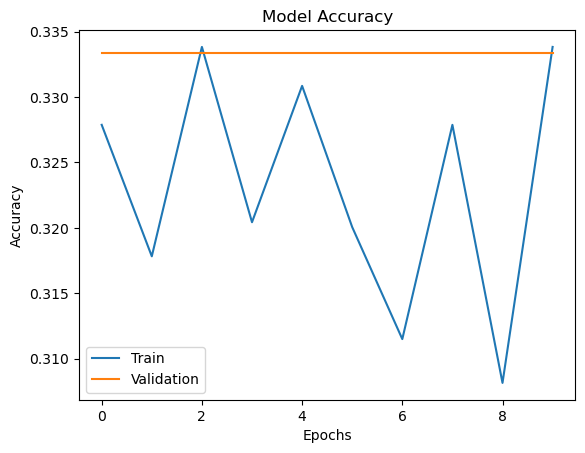

In [21]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","Validation"])
plt.show()

This code plots the training and validation loss over epochs using matplotlib.pyplot. The training loss is accessed from history.history["loss"], and the validation loss is accessed from history.history["val_loss"]. The title, x-axis label, y-axis label, and legend are added for clarity, and finally, plt.show() displays the plot

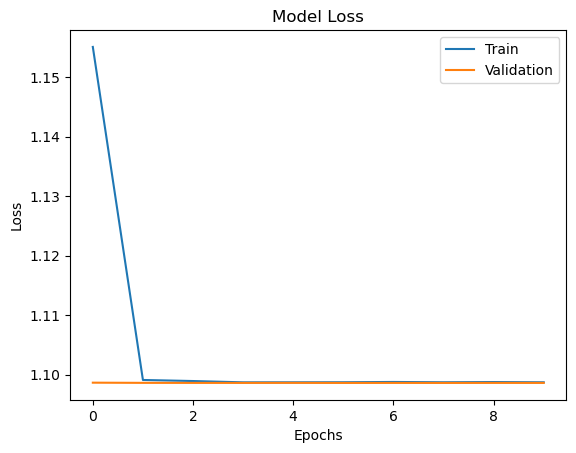

In [22]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","Validation"])
plt.show()

This line of code assigns the class labels to the variable class_labels by accessing the class indices from the training data generator x_train. The class_indices attribute provides a dictionary mapping class names to their respective numerical indices.

In [23]:
class_labels=x_train.class_indices

This code creates a dictionary class_names where the keys are the numerical indices of the classes, and the values are the corresponding class names. It swaps the keys and values from the class_labels dictionary. Finally, it prints the class names. This mapping can be useful for interpreting model predictions.

In [24]:
class_names={value:key for key,value in class_labels.items()}
print("Class Names:",class_names)

Class Names: {0: 'paper', 1: 'rock', 2: 'scissors'}


This line of code imports the image module from TensorFlow's Keras API. This module provides utilities for loading and preprocessing images, which can be useful for tasks such as image augmentation, loading images for prediction, and more.

In [25]:
from tensorflow.keras.preprocessing import image 

This line of code assigns the file path "C:\Users\vaish\OneDrive\Desktop\AI\archive (7)\paper\paper_34.png" to the variable img_path, representing the location of an image file on the local filesystem.

In [26]:
img_path=r"C:\Users\vaish\OneDrive\Desktop\AI\archive (7)\test\rock\rock_901.png"

This line of code loads the image located at the file path specified by img_path using the load_img function from the image module. It also resizes the image to the target size (img_width, img_height) specified earlier.

In [27]:
img=image.load_img(img_path,target_size=(img_width,img_height))

This line of code converts the image img to a NumPy array representation using the img_to_array function from the image module. It converts the image from its current PIL (Python Imaging Library) format to a NumPy array, making it suitable for further processing with TensorFlow or other libraries.

In [28]:
img_arr=image.img_to_array(img)

This line of code expands the dimensions of the NumPy array img_arr along axis 0, effectively adding a batch dimension to the array, commonly used for feeding data into models.

In [29]:
img_arr=np.expand_dims(img_arr,axis=0)

This line of code normalizes the pixel values of the image array img_arr by dividing each pixel value by 255.0, ensuring that the pixel values are within the range of [0,1], which is a common preprocessing step for neural networks.

In [30]:
img_arr=img_arr/255.0

This line of code uses the trained model model to make predictions on the input image array img_arr, resulting in a prediction array pred containing the model's predicted probabilities for each class.

In [31]:
pred=model.predict(img_arr)

1/1 [==============================] - 0s 415ms/step


This line of code computes the index of the class with the highest predicted probability from the prediction array pred, assigning it to the variable pred_class.

In [32]:
pred_class=np.argmax(pred)

This line of code retrieves the class name corresponding to the predicted class index pred_class from the class_names dictionary, providing the human-readable label for the predicted class.

In [33]:
class_names[pred_class]

'paper'